In [1]:
import pandas as pd


In [2]:
data = pd.read_csv("Gold_Price_DataSet.csv")


In [3]:
data.head()


,Date,Price,Open,High,Low,Volume,Chg%
0,2024-11-06,77030,78300,78570,77030,0,-1.86
1,2024-11-05,78490,78224,78670,78160,0,0.11
2,2024-11-04,78401,78498,78642,78237,0,-0.54
3,2024-11-01,78829,78650,78887,78550,0,0.64
4,2024-10-31,78326,79264,79999,77803,90,-1.17


In [10]:
data.drop( 'Volume' ,axis=1 ,inplace = True)

In [11]:
data.drop( 'Chg%' ,axis=1 ,inplace = True)

In [12]:
data

,Date,Price,Open,High,Low
0,2024-11-06,77030,78300,78570,77030
1,2024-11-05,78490,78224,78670,78160
2,2024-11-04,78401,78498,78642,78237
3,2024-11-01,78829,78650,78887,78550
4,2024-10-31,78326,79264,79999,77803
...,...,...,...,...,...
2801,2014-01-06,29119,29300,29395,29051
2802,2014-01-04,29279,29279,29279,29279
2803,2014-01-03,29727,30031,30125,29539
2804,2014-01-02,29975,29678,30050,29678


In [13]:
data['Date']=pd.to_datetime(data['Date'])

In [15]:
data = data.set_index(data['Date'])

In [16]:
# prompt: i need to train a linear regression model for predicting price of gold
# depending on date

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' DataFrame is already loaded and preprocessed as in the previous code

# Prepare the data for training
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date'])) # Convert date to numeric representation
X = data[['Date']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24882940.716954947
R-squared: 0.8676442023831308


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' DataFrame is already loaded and preprocessed as in the previous code

# Prepare the data for training
data['Date'] = pd.to_numeric(pd.to_datetime(data['Date'])) # Convert date to numeric representation
X = data[['Date']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 24882940.716954947
R-squared: 0.8676442023831308


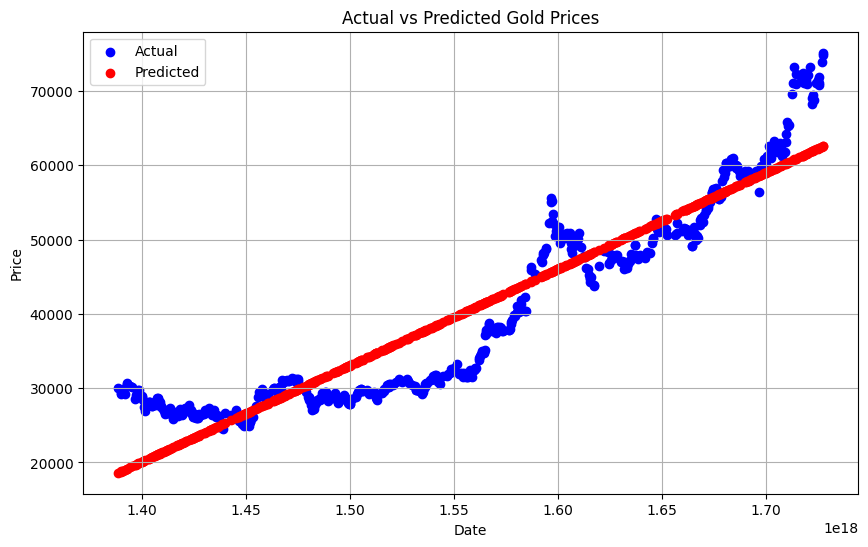

In [24]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs Predicted Gold Prices")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [27]:
give = pd.DataFrame([pd.to_numeric(pd.to_datetime(['2023-01-01']))])
give.columns = ['Date']
g = model.predict(give)
print(g)

[55484.20951941]
